# Visualising data
## 1. Introduction

Although mathematics is the fundamental basis of physics and astrophysics, we cannot always easily convert numbers and equations into a coherent picture. Plotting is therefore a vital tool in bridging the gap between raw data and a deeper scientific understanding.

Here we us the Python visualisation library, ``matplotlib``. Visit [matplotlib.org](https://matplotlib.org/) for detailed information regarding ``Matplotlib``.

*Disclaimer:*

There are many ways to make the same plot in ``matplotlib`` and there are many ways to bin your data. Often, there is no "best" way to display data in a plot, and the message conveyed can be heavily dependent on the context of the data as well as asthetic plotting decisions.

For example, in histograms, as we discuss below, the relatively subjective choice of bin size can significantly affect the interpretation of the results. It is important to be aware of when and how we make these choices and to try to reduce any unintended bias.

### 1.1 Paths


In [1]:
pathToData = '../COMPAS_Output.h5'

### 1.2 Imports

In [2]:
# Python libraries
import numpy as np               #for handling arrays
import h5py as h5                #for reading the COMPAS data
import matplotlib.pyplot as plt  #for plotting
%matplotlib inline

## 2. Example: component masses of DCOs

In the example below, we use the following conventions:

1 - We deliberately choose to use the ``matplotlib.pyplot.subplots`` function even when creating a single figure (as opposed to using ``pyplot.plot``). This is because many online forums (e.g. ``Stackoverflow``) use this syntax. Furthermore, this means you do not have to learn two different types of syntax when creating either a single or multiple panel figure.

2 - We choose to do the binning within the ``NumPy`` array environment instead of with inbuilt functions such as``plt.hist``/``axes.hist``. The reason is that you have more control over what you do, such as custom normalization (using rates, weights, pdf, etc.). It also forces you to have a deeper understanding of what you are calculating, and allows you to check intermediate steps with print statements.  Once you know how to bin your data this way you can also easily expand these routines for more complicated plots (2D binning).

### 2.1 Get some data to plot

In [3]:
Data  = h5.File(pathToData)

print(list(Data.keys()))
# DCOs = double compact objects


DCOs = Data['BSE_Double_Compact_Objects']

M1   = DCOs['Mass(1)'][()]
M2   = DCOs['Mass(2)'][()]
Mtot = np.add(M1, M2)

['BSE_Common_Envelopes', 'BSE_Double_Compact_Objects', 'BSE_RLOF', 'BSE_Supernovae', 'BSE_System_Parameters', 'Run_Details']


In [4]:
Data.close()

### 2.2 Histogram

In [5]:
# You can use numpy to create an array with specific min, max and interval values
minMtot = 0
maxMtot = max(Mtot)
nBins   = 50

# Number of bin edges is one more than number of bins
binEdges = np.linspace(minMtot, maxMtot, nBins+1)

# What is the value at the center of the bin?
# add each edge of the side of the bin and divide by 2
xvaluesHist  = (binEdges[:-1] + binEdges[1:])/2.

# What is the width of each bin? (an array in general, if the spacing is non-uniform)
binWidths = np.diff(binEdges)


### Set yvalues to the height of the bins

# Create an array of y-values for each x-value
yvalues = np.zeros(len(xvaluesHist))

# Iterate over the bins to calcuate the number of data points per bin
for iBin in range(nBins):
    mask = (Mtot >= binEdges[iBin]) & (Mtot < binEdges[iBin+1])
    yvalues[iBin] = np.sum(mask)

# You can of course apply any mask you like to get the desired histogram    

## Generally, you can calculate the rate per unit x (dy/dx) using
dYdXHist = np.divide(yvalues, binWidths)

# To convert your distribution to a PDF, normalize in y-values:
PDF = np.divide(yvalues, np.sum(yvalues))

# You can then multiply by, e.g, rates/weights to scale the distribution

### 2.3 CDF

Sometimes we want to know what fraction of the data lies below a given value. To find this, we calculate a Cumulative Distribution Function, or CDF.

In [6]:
# Question: How many points have a value less than X? 

# Sort the values of interest
MtotSorted = np.sort(Mtot)   

# These values are your xvalues 
xvaluesCDF = MtotSorted

# The CDF is a non-strictly increasing function from 0 to 1 across the range of x values.
# It should increment by 1/len(xvaluesCDF) at each x in the array, and remain constant otherwise.

# Numpy provides several functions that make this very straightforward
nDataPoints = len(xvaluesCDF)
yvalues = np.cumsum(np.ones(nDataPoints))
CDF = yvalues / nDataPoints

### 2.4 A two panel plot

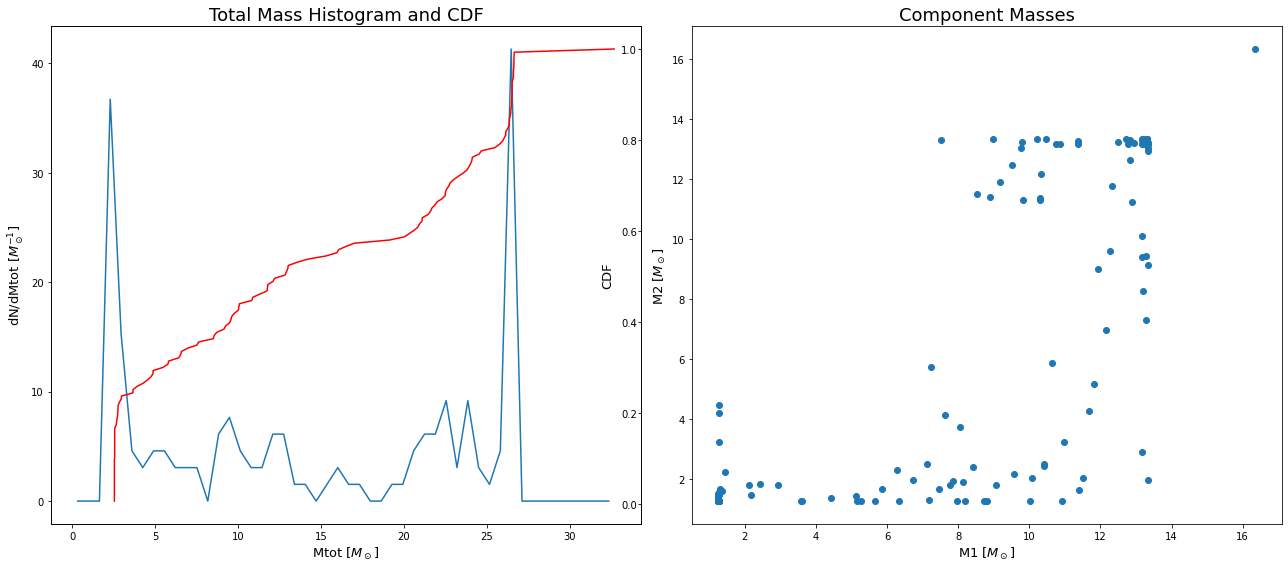

In [7]:
# For two panels side by side:
fig, axes = plt.subplots(1,2, figsize=(18,8))

# axes is an array relating to each panel
# panel1 = axes[0]
# panel2 = axes[1]

largefontsize = 18
smallfontsize = 13




### In the left panel, we want to plot the histogram and CDF overlayed
### with the same x-axis, but different y-axes

# Plot the Histogram first
histAxes = axes[0]
histAxes.plot(xvaluesHist, dYdXHist)

histAxes.set_xlabel(r'Mtot [$M_\odot$]', fontsize=smallfontsize)
histAxes.set_ylabel(r'dN/dMtot [$M_\odot^{-1}$]', fontsize=smallfontsize)

# Overlay the CDF with the same x-axis but different y-axis
cdfAxes =  axes[0].twinx()
cdfAxes.plot(xvaluesCDF, CDF, c='r')

# Dont have to do xlabel since they are the same
cdfAxes.set_ylabel('CDF', fontsize=smallfontsize, labelpad=-40)
cdfAxes.tick_params(axis='y', direction='in', pad=-20) # Adjust the CDF axis for clarity in the plot

axes[0].set_title('Total Mass Histogram and CDF', fontsize=largefontsize)




### In the right panel, we want to display a scatterplot of M1 & M2 

axes[1].scatter(M1, M2)
axes[1].set_xlabel(r'M1 [$M_\odot$]', fontsize=smallfontsize)
axes[1].set_ylabel(r'M2 [$M_\odot$]', fontsize=smallfontsize)

axes[1].set_title('Component Masses', fontsize=largefontsize)




### Clean up and display the plot

# You can force plt to pad enough between plots
# such that the labels fit
plt.tight_layout()

# If you want to save the figure, use:
#plt.savefig(pathToSave)

# To produce the plot, always remember to:
plt.show()